<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Project</center></b></h2>
    <h4><i><b><center>Predicting Cervical Cancer: A Machine Learning Approach Using Risk Factor Analysis 
</center></b></i></h4></td></tr>
</table>


 <h3>Requesitos nos  modelos </h3>
 <li> Comparison of at least 3 models</li>
 <li>Cross-Validation</li>
 <li> Grid Search </li>
 <li> Results evaluation and discussion </li>


<h3>Avaliação </h3>

 <li> Quality of coding (temos de tipo comentar e explicar tudo)</li>
 <li>Creativity</li>
 <li> Comparison with the state of the Art </li>



In [45]:
#!pip install ucimlrepo
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from typing import Tuple
from sklearn.model_selection import train_test_split


<h3>1. Introdução </h3>

Cervical cancer is the fourth most common cancer worldwide and a significant cause of mortality, particularly in low- and middle-income countries, where 94% of all deaths occur [1]. Although medicine has evolved, implementing cytology-based and other types of screening remains challenging in these countries due to the lack of healthcare infrastructure and trained professionals [2]. 
With that in mind, machine learning can be used as a helpful system for interpreting complex datasets and support clinical decision-making due to its strong data analysis capabilities [3]. 

The initial approach was to utilize these caracteristics combined with the risk factors, in order to predict the presence of the disease. However, upon analyzing the data, it occured to us we could rewire the project to predict the results of the main four tests used to detect cervical cancer. This work could be relevant in the management of clinical resources. For example, a person that shows some risk factors, can be called in to make only two out of the four exams, saving not only financial resources but also material ones.

 <h3>2. Data Preparation </h3>

<h4> 2.1 Data import </h4>

In [50]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
df_cervical_cancer = cervical_cancer_risk_factors.data.features 

#Getting dataset dimensions
n_rows = df_cervical_cancer.shape[0]
n_features = df_cervical_cancer.shape[1]
print('The dataset has {} samples and {} features. \n'.format(n_rows, n_features))

#Showing the first 10 rows of the dataset
print('The first 10 rows are displayed below. \n\n')
df_cervical_cancer.head()



The dataset has 858 samples and 36 features. 

The first 10 rows are displayed below. 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


<p style="font-size:15px;"> The data is divided in integer values, to evaluate, age number of sexual partners, etc, and a binary classification (0 as false and 1 as true) to evaluate the results of the tests, presence of STD's etc. </p>

In [52]:
print(df_cervical_cancer.dtypes)


Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [53]:
#Get all the columns with a binary classification 
binary_columns = df_cervical_cancer.loc[:, (df_cervical_cancer.isin([0, 1]) | df_cervical_cancer.isna()).all()]
binary_columns.describe().iloc[[0]]

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,845.0,750.0,741.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0,...,753.0,753.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0


In [54]:
#Get the columns with continuos values
continuous_columns = df_cervical_cancer.drop(binary_columns.columns, axis=1)
continuous_columns.describe().iloc[[0,1,2,3,7]]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


In [55]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> As colunas  'STDs: Time since first diagnosis' e 'STDs: Time since last diagnosis' have a lot of missing values  então vamos droppar (n me apetece escrever em ingles)</p>

In [57]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)
df_cervical_cancer.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [58]:
df_cervical_cancer = df_cervical_cancer.dropna()
print(df_cervical_cancer.shape[0])

668


In [59]:
zero_per_columns = (df_cervical_cancer == 0).sum()
print(zero_per_columns)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     14
Smokes                                572
Smokes (years)                        572
Smokes (packs/year)                   572
Hormonal Contraceptives               238
Hormonal Contraceptives (years)       238
IUD                                   593
IUD (years)                           593
STDs                                  603
STDs (number)                         603
STDs:condylomatosis                   631
STDs:cervical condylomatosis          668
STDs:vaginal condylomatosis           664
STDs:vulvo-perineal condylomatosis    632
STDs:syphilis                         653
STDs:pelvic inflammatory disease      667
STDs:genital herpes                   667
STDs:molluscum contagiosum            667
STDs:AIDS                             668
STDs:HIV                              655
STDs:Hepatitis B                  

<p style="font-size:15px;">STDs:AIDS e STDs:cervical condylomatosis  têm todos os valores = 0 pelo q vamos dropar  </p>

In [61]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)
df_cervical_cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


 <h3>3. Model Training </h3>

In [87]:
from sklearn.model_selection import cross_val_score


def train_and_evaluation(model: Tuple[str, any], X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> dict[str, float]:
    """
    Train and evaluate a machine learning model using training and test datasets.

    This function fits the model to the training data, makes predictions on both 
    the training and test sets, and performs cross-validation to assess model performance.

    :param model: A tuple containing the model name as a string and the model instance.
    :param X_train: Training features as a numpy array.
    :param y_train: Training labels as a numpy array.
    :param X_test: Test features as a numpy array.
    :param y_test: Test labels as a numpy array.
    :return: A dictionary containing training score, test score, 
             and cross-validation metrics (mean and standard deviation of accuracy).
    """
    
    # get the model name and the model instance
    model_name,model_instance = model
    

    # Train the model on the training data
    model_instance.fit(X_train,y_train)

    # calculate the accurcay on the training and test sets using the .score() method
    train_acc = model_instance.score(X_train, y_train)
    test_acc = model_instance.score(X_test, y_test)
    
    # Perform cross-validation and compute accuracy scores
    acc_cv= cross_val_score(estimator=model_instance, X=X_train, y=y_train, cv=10)

    
    # Create a dictionary to summarize the performance metrics
    metrics = {  
        'Model Name: 
        'Train ACC': train_acc,                 # Training accuracy
        'Test ACC': test_acc,                   # Test accuracy
        'K-fold ACC mean': np.mean(acc_cv),     # Mean accuracy from cross-validation
        'K-fold ACC std': np.std(acc_cv)        # Standard deviation of cross-validation accuracy
    }

    
    return metrics

In [65]:
#Preparar os Dados - meti aqui por ser uma coisa geral a todos os modelos
Y = df_cervical_cancer.loc[:,['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
X = df_cervical_cancer.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'],axis=1)


3.1 - Random Forest

In [97]:
#Dividir os dados em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Treinar os modelos
from sklearn.ensemble import RandomForestClassifier
models = []
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, Y_train)
    models.append(model)

#Previsões
predictions = {}
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
for i, target in enumerate(['Hinselmann', 'Schiller', 'Citology', 'Biopsy']):
    predictions[target] = models[i].predict(X_test)

#Avaliação
from sklearn.metrics import accuracy_score, roc_auc_score
acc_train = accuracy_score(Y_train, y_pred_train)
acc_test = accuracy_score(Y_test, y_pred_test)
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    print(f"Resultados para {target}:")
    print('Accuracy test set:', acc_test)
    print('Accuracy training set:', acc_train)

Resultados para Hinselmann:
Accuracy test set: 0.835820895522388
Accuracy training set: 0.9906367041198502
Resultados para Schiller:
Accuracy test set: 0.835820895522388
Accuracy training set: 0.9906367041198502
Resultados para Citology:
Accuracy test set: 0.835820895522388
Accuracy training set: 0.9906367041198502
Resultados para Biopsy:
Accuracy test set: 0.835820895522388
Accuracy training set: 0.9906367041198502


In [99]:
# Definir o grid de parâmetros com valores válidos
param_grid = {
    'n_estimators': [100, 300],          # Número de árvores
    'max_depth': [None, 10, 20],         # Profundidade máxima
    'min_samples_split': [2, 5, 10],    # Divisão mínima válida
    'min_samples_leaf': [1, 2, 4],      # Tamanho mínimo da folha
}

# Ajustar hiperparâmetros para cada target
best_models = {}
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    print(f"Ajustando modelo para: {target}")
    
    # Configurar o GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,  # Validação cruzada com 5 folds
    )
    
    # Treinar o GridSearchCV
    grid_search.fit(X_train, Y_train[target])
    
    # Melhor modelo para o target atual
    best_models[target] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {target}:", grid_search.best_params_)

# Avaliação dos melhores modelos
from sklearn.metrics import accuracy_score, roc_auc_score

for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    # Previsões do modelo otimizado
    y_pred = best_models[target].predict(X_test)
    y_proba = best_models[target].predict_proba(X_test)[:, 1]
    
    # Avaliar a performance
    auc_roc = roc_auc_score(Y_test[target], y_proba)
    accuracy = accuracy_score(Y_test[target], y_pred)
    print(f"\nResultados para {target}:")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

Ajustando modelo para: Hinselmann
Melhores hiperparâmetros para Hinselmann: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Ajustando modelo para: Schiller
Melhores hiperparâmetros para Schiller: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Ajustando modelo para: Citology
Melhores hiperparâmetros para Citology: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Ajustando modelo para: Biopsy
Melhores hiperparâmetros para Biopsy: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Resultados para Hinselmann:
AUC-ROC: 0.4792
Accuracy: 0.9328

Resultados para Schiller:
AUC-ROC: 0.7247
Accuracy: 0.8731

Resultados para Citology:
AUC-ROC: 0.6112
Accuracy: 0.9030

Resultados para Biopsy:
AUC-ROC: 0.7679
Accuracy: 0.9030


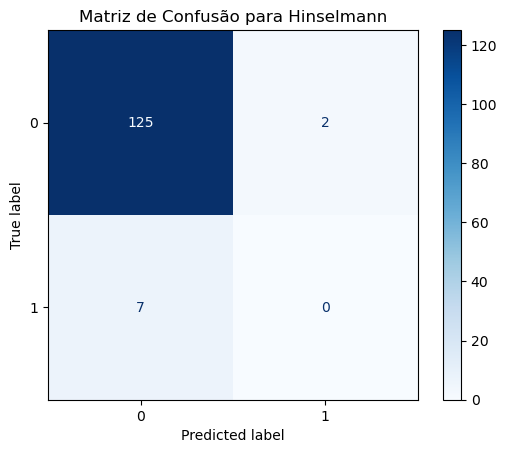

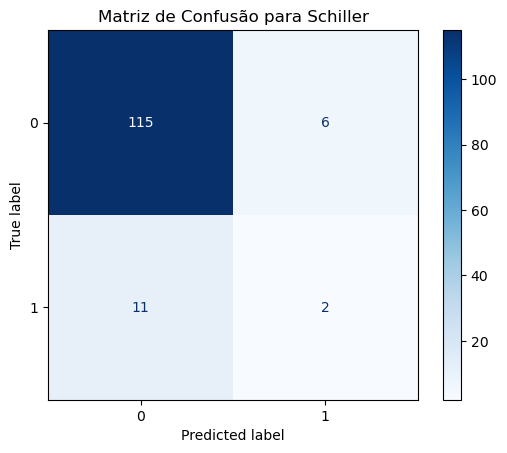

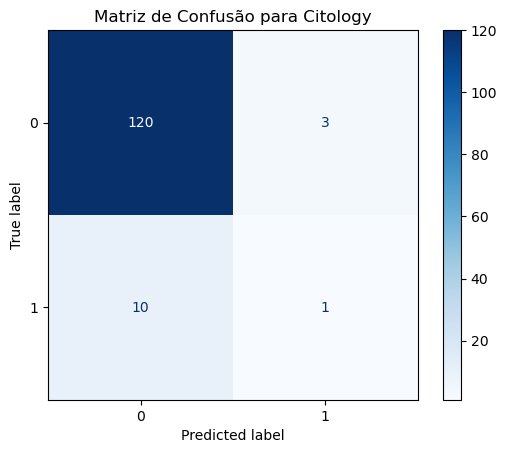

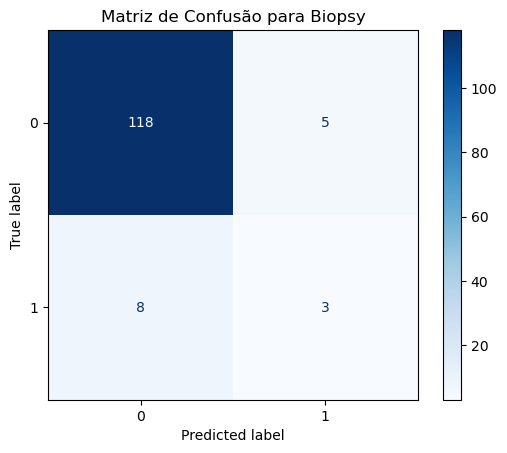

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar e visualizar matrizes de confusão para os melhores modelos
for target in ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    # Previsões no conjunto de teste
    y_true = Y_test[target]  # Valores reais da variável de alvo
    y_pred = best_models[target].predict(X_test)  # Predições do modelo otimizado
    
    # Gerar a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Visualizar a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_models[target].classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão para {target}')
    plt.show()


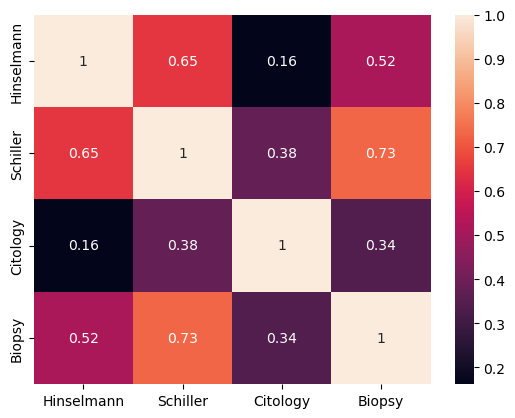

In [45]:
#Correlação entre as target variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_cervical_cancer[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].corr(), annot=True)
plt.show()

3.2 - Support Vector Machine (SVM)


In [89]:
from sklearn.svm import LinearSVC, SVC

model = ['SVC', SVC()]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model_metrics = train_and_evaluation(model, X_train, y_train, X_test, y_test)
mm=pd.DataFrame(model_metrics).set_index('SVC')
print(mm)


AttributeError: 'DataFrame' object has no attribute '_validate_params'

3.3

3.4 - Ensemble

3.5 - Diagnóstico Dx

 <h3>4. Result evaluation</h3>

 <h3>5. Discussion</h3>

 <h3>6. Model test (onde fazemos o questionário para mostrar a aplicação do nosso modelo</h3>